In [33]:
def InitializeWeights(nodes):
    """Initialize weights with random values in [-1, 1] (including bias)"""
    layers, weights = len(nodes), []

    for i in range(1, layers):
        w = [[np.random.uniform(-1, 1) for k in range(nodes[i-1] + 1)]
              for j in range(nodes[i])]
        weights.append(np.matrix(w))

    return weights

In [34]:
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

def SigmoidDerivative(x):
    return np.multiply(x, 1-x)

In [35]:
def Predict(item, weights):
    layers = len(weights)
    item = np.append(1, item)

    activations = ForwardPropagation(item, weights, layers)

    outputFinal = activations[-1].A1
    index = FindMaxActivation(outputFinal)

    y = [0 for i in range(len(outputFinal))]
    y[index] = 1

    return y


def FindMaxActivation(output):
    """Find max activation in output"""
    m, index = output[0], 0
    for i in range(1, len(output)):
        if(output[i] > m):
            m, index = output[i], i

    return index

In [36]:
def Accuracy(X, Y, weights):
    """Run set through network, find overall accuracy"""
    correct = 0

    for i in range(len(X)):
        x, y = X[i], list(Y[i])
        guess = Predict(x, weights)

        if(y == guess):
            correct += 1

    return correct / len(X)

In [37]:
def Train(X, Y, lr, weights):
    layers = len(weights)
    for i in range(len(X)):
        x, y = X[i], Y[i]
        x = np.matrix(np.append(1, x))

        activations = ForwardPropagation(x, weights, layers)
        weights = BackPropagation(y, activations, weights, layers)

    return weights

In [38]:
def NeuralNetwork(X_train, Y_train, X_val=None, Y_val=None, epochs=10, nodes=[], lr=0.15):
    hidden_layers = len(nodes) - 1
    weights = InitializeWeights(nodes)

    for epoch in range(1, epochs+1):
        weights = Train(X_train, Y_train, lr, weights)

        if(epoch % 20 == 0):
            print("Epoch {}".format(epoch))
            print("Training Accuracy:{}".format(Accuracy(X_train, Y_train, weights)))
            if X_val.any():
                print("Validation Accuracy:{}".format(Accuracy(X_val, Y_val, weights)))

    return weights

In [39]:
def ForwardPropagation(x, weights, layers):
    activations, layer_input = [x], x
    for j in range(layers):
        activation = Sigmoid(np.dot(layer_input, weights[j].T))
        activations.append(activation)
        layer_input = np.append(1, activation)

    return activations

In [40]:
def BackPropagation(y, activations, weights, layers):
    outputFinal = activations[-1]
    error = np.matrix(y - outputFinal)

    for j in range(layers, 0, -1):
        currActivation = activations[j]

        if(j > 1):
            prevActivation = np.append(1, activations[j-1])
        else:
            prevActivation = activations[0]

        delta = np.multiply(error, SigmoidDerivative(currActivation))
        weights[j-1] += lr * np.multiply(delta.T, prevActivation)

        w = np.delete(weights[j-1], [0], axis=1)
        error = np.dot(delta, w)

    return weights

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 20
Training Accuracy:0.6578947368421053
Validation Accuracy:0.7692307692307693
Epoch 40
Training Accuracy:0.9649122807017544
Validation Accuracy:1.0
Epoch 60
Training Accuracy:0.9473684210526315
Validation Accuracy:0.9230769230769231
Epoch 80
Training Accuracy:0.9649122807017544
Validation Accuracy:0.9230769230769231
Epoch 100
Training Accuracy:0.9736842105263158
Validation Accuracy:1.0
Epoch 20
Training Accuracy: 0.9824561403508771
Validation Accuracy: 1.0
Epoch 40
Training Accuracy: 0.9824561403508771
Validation Accuracy: 1.0
Epoch 60
Training Accuracy: 0.9824561403508771
Validation Accuracy: 1.0
Epoch 80
Training Accuracy: 0.9824561403508771
Validation Accuracy: 1.0
Epoch 100
Training Accuracy: 0.9824561403508771
Validation Accuracy: 1.0


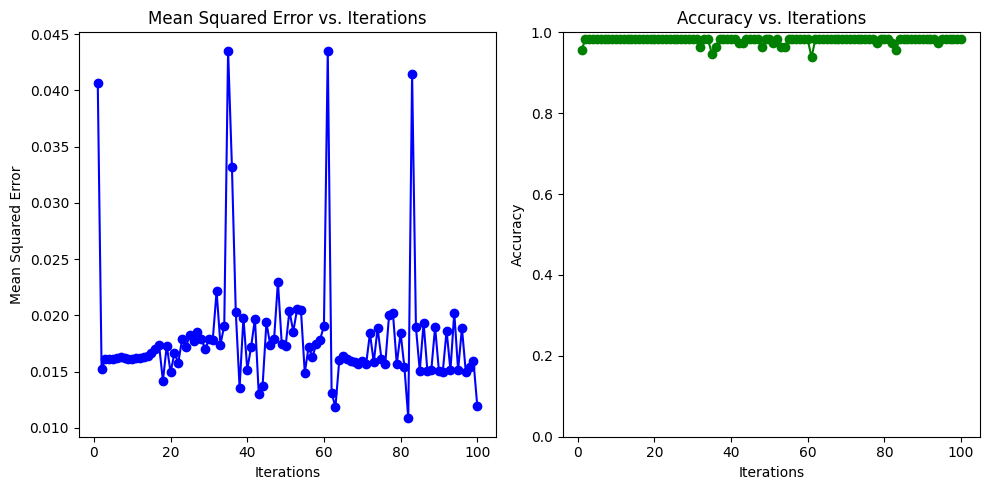

Testing Accuracy: 0.9130434782608695


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

iris = pd.read_csv("/content/iris.csv")
iris = iris.sample(frac=1).reset_index(drop=True)

X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X = np.array(X)

one_hot_encoder = OneHotEncoder(sparse=False)
Y = iris.species
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)

epochs = 100
nodes = [len(X[0]), 5, 10, len(Y[0])]
lr = 0.15

weights = NeuralNetwork(X_train, Y_train, X_val, Y_val, epochs=epochs, nodes=nodes, lr=lr)

def MeanSquaredError(X, Y, weights):
    error = 0

    for i in range(len(X)):
        x, y = X[i], Y[i]
        x = np.matrix(np.append(1, x))

        activations = ForwardPropagation(x, weights, len(weights))
        outputFinal = activations[-1].A1

        error += np.sum((y - outputFinal) ** 2)

    return error / (2 * len(X))

mse_values = []
accuracy_values = []

for epoch in range(1, epochs+1):
    weights = Train(X_train, Y_train, lr, weights)

    mse = MeanSquaredError(X_train, Y_train, weights)
    mse_values.append(mse)

    if epoch % 20 == 0:
        print("Epoch {}".format(epoch))
        print("Training Accuracy: {}".format(Accuracy(X_train, Y_train, weights)))
        if X_val is not None:
            print("Validation Accuracy: {}".format(Accuracy(X_val, Y_val, weights)))

    accuracy = Accuracy(X_train, Y_train, weights)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(mse_values) + 1), mse_values, marker='o', linestyle='-', color='b')
plt.title('Mean Squared Error vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy_values) + 1), accuracy_values, marker='o', linestyle='-', color='g')
plt.title('Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)

plt.tight_layout()
plt.show()

testing_accuracy = Accuracy(X_test, Y_test, weights)
print("Testing Accuracy: {}".format(testing_accuracy))
